In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df1 = pd.read_csv("/content/i1.csv")
df2 = pd.read_csv("/content/i2.csv")

In [ ]:
df1.shape
#df2.shape

(8379, 16)

In [ ]:
# df1.merge(df2, how='outer')

data = df1.merge(df2, how='outer')
data.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-04-01,2023-04-01 13:16:03,23465,Babycorn Manchurian,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,Veg Starters,NaN
1,2023-04-01,2023-04-01 13:16:03,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN
2,2023-04-01,2023-04-01 13:16:03,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.0,315.0,20.0,biller,0,NaN,Veg Gravy,NaN
3,2023-04-01,2023-04-01 13:16:03,23465,Pulka (2 No),40.0,3.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,Indian Breads,NaN
4,2023-04-01,2023-04-01 13:16:03,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN


In [ ]:
data.shape

(15621, 16)

In [ ]:
data["Invoice No."].unique()

array([23465, 23466, 23467, ..., 28387, 28388, 28389])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB


In [ ]:
data['Final Total'].sum()

np.float64(2397010.12)

In [ ]:
avg_order_val = data['Final Total'].sum()/data['Invoice No.'].nunique()
avg_order_val

np.float64(486.70256243654825)

In [ ]:
#28327
data[data['Invoice No.']==28327]['Final Total'].sum()

np.float64(1081.5)

In [ ]:
data.groupby('Invoice No.')['Final Total'].sum().loc[28327]

np.float64(1081.5)

In [ ]:
# Qunatity wise top 3 items sold
t3 = data.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False).head()

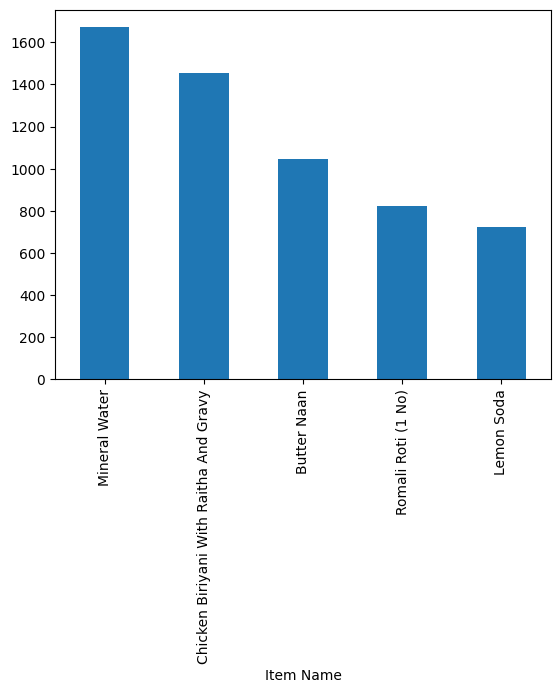

In [ ]:
# bar chart for t3
import matplotlib.pyplot as plt
t3.plot(kind='bar')
plt.show()

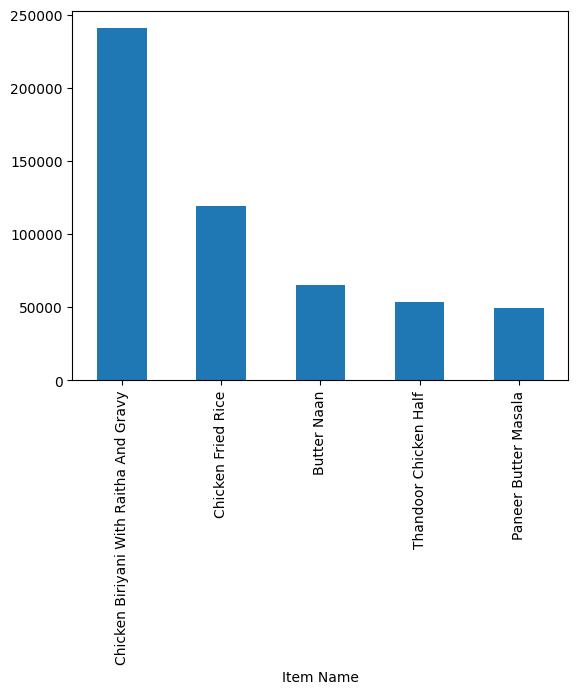

In [ ]:
#
t5 = data.groupby('Item Name')['Final Total'].sum().sort_values(ascending=False).head(5)
t5.plot(kind='bar')
plt.show()

In [ ]:
data.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False).head()

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0
Romali Roti (1 No),822.0
Lemon Soda,722.0
